In [82]:
from vnstock import *
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [83]:
df = stock_historical_data(symbol="FPT", type="stock", start_date=str(dt.date.today()-dt.timedelta(122)), end_date=str(dt.date.today()))

df['time'] = df['time'].astype(str)
df.set_index('time', inplace=True)

df

,open,high,low,close,volume,ticker
time,,,,,,
2023-06-16,71450,73230,70860,71790,2231500,FPT
2023-06-19,71970,72640,71790,71970,663200,FPT
2023-06-20,72220,72900,71970,72640,944500,FPT
2023-06-21,72640,73410,72560,72900,705800,FPT
2023-06-22,73150,73490,71970,72640,1019700,FPT
...,...,...,...,...,...,...
2023-10-09,92400,95600,92200,95600,3657000,FPT
2023-10-10,96500,97200,95400,96300,3255500,FPT
2023-10-11,95900,98000,95900,97000,2358200,FPT


In [84]:
# Calculate MACD
short_period = 12
long_period = 26
signal_period = 9

df['ShortEMA'] = df['close'].ewm(span=short_period, adjust=False).mean()
df['LongEMA'] = df['close'].ewm(span=long_period, adjust=False).mean()
df['MACD'] = df['ShortEMA'] - df['LongEMA']
df['Signal'] = df['MACD'].ewm(span=signal_period, adjust=False).mean()

# Calculate the MACD Histogram
df['Histogram'] = df['MACD'] - df['Signal']



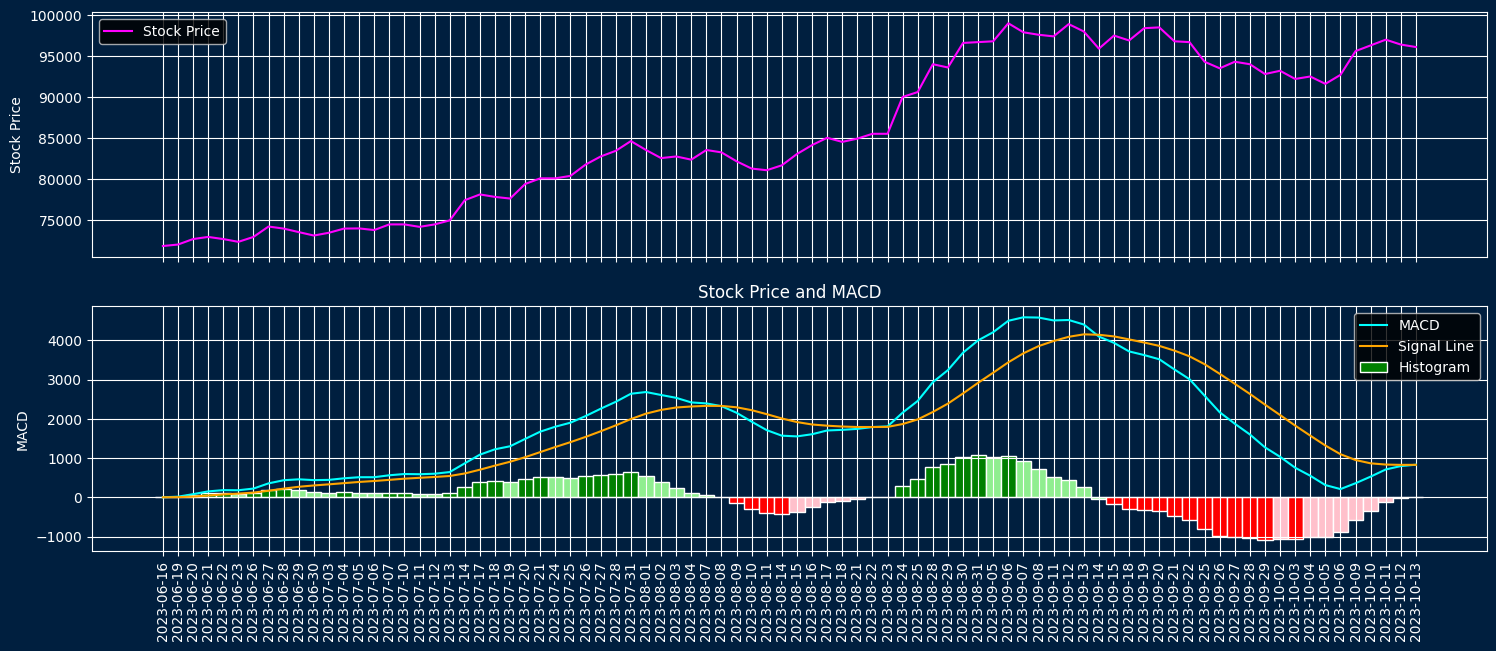

In [100]:

# Determine colors for the MACD Histogram bars
colors = []

for i in range(len(df)):
    if i > 0 and df['Histogram'][i - 1] >= 0 and df['Histogram'][i] < df['Histogram'][i - 1]:
        colors.append('lightgreen')  # Indicates a change in trend (lighter color)
    elif  i > 0 and df['Histogram'][i] < 0 and df['Histogram'][i - 1] < 0 and df['Histogram'][i] > df['Histogram'][i - 1]:
        colors.append('pink')
    else:
        colors.append('g' if df['Histogram'][i] >= 0 else 'r')




# Create subplots
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(18, 7))
fig.patch.set_facecolor('#001f3f')

ax1.set_facecolor('#001f3f')
ax2.set_facecolor('#001f3f')

# Plot stock price on the top subplot
ax1.plot(df.index, df['close'], label='Stock Price', color='magenta')
ax1.set_ylabel('Stock Price', color='white')
ax1.grid(color='white')  # Adjust grid color

# Plot MACD and Histogram on the bottom subplot with custom colors
ax2.plot(df.index, df['MACD'], label='MACD', color='cyan')
ax2.plot(df.index, df['Signal'], label='Signal Line', color='orange')

# Plot the MACD Histogram with custom colors
ax2.bar(df.index, df['Histogram'], width=1, label='Histogram', color=colors, edgecolor='white')

ax2.set_ylabel('MACD', color='white')
ax2.grid()

# Add title and legend
plt.title('Stock Price and MACD', color='white')

ax1.legend()
ax2.legend()       

# Rotate the x-axis date labels for better visibility
plt.xticks(rotation=90)

plt.show()
